<a href="https://colab.research.google.com/github/Kirity12/Incident-Gas-Distribution-Project/blob/main/incident_gas_distribution_Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict

In [6]:
dataset = pd.read_excel(r'/content/incident_gas_distribution_jan2010_present.XLSX')
dataset.head()

REPORT_RECEIVED_DATE  IYEAR  REPORT_NUMBER  SUPPLEMENTAL_NUMBER  \
0           2023-11-16   2023       20230068                38814   
1           2023-11-30   2023       20230070                38870   
2           2023-11-15   2023       20230067                38806   
3           2023-11-10   2023       20230066                38816   
4           2023-11-20   2023       20230069                38836   

          REPORT_TYPE  OPERATOR_ID  \
0      ORIGINAL FINAL        12408   
1      ORIGINAL FINAL        12350   
2            ORIGINAL         2600   
3  SUPPLEMENTAL FINAL        18484   
4      ORIGINAL FINAL        22182   

                                                NAME OPERATOR_STREET_ADDRESS  \
0                                    DTE GAS COMPANY        1  ENERGY PLAZA    
1  CENTERPOINT ENERGY RESOURCES CORP., DBA CENTER...     1111 LOUISIANA ST     
2                       COLUMBIA GAS OF PENNSYLVANIA       121 CHAMPION WAY    
3                         SOUTHERN CALIFORNIA GAS CO  555 WEST FIFTH STREET    
4                            WASHINGTON GAS LIGHT CO  1000 MAINE AVENUE, SW    

  OPERATOR_CITY_NAME OPERATOR_STATE_ABBREVIATION  ... PREPARER_TELEPHONE  \
0            DETROIT                          MI  ...                NaN   
1            HOUSTON                          TX  ...       612.321.5366   
2         CANONSBURG                          PA  ...         7243217155   
3        LOS ANGELES                          CA  ...       310-970-4854   
4         WASHINGTON                          DC  ...         5713187993   

   PREPARER_FAX LOCAL_CONTACT_NAME                 LOCAL_CONTACT_EMAIL  \
0           NaN                NaN                                 NaN   
1  612.321.0000       DEAN HEADLEE  dean.headlee@centerpointenergy.com   
2           NaN         RICK BURKE                 rburke@nisource.com   
3  909-335-7895    JAMES CERVANTES            jjcervantes@socalgas.com   
4           NaN          ART GROFF                  agroff@washgas.com   

  LOCAL_CONTACT_TELEPHONE  AUTHORIZER_NAME  \
0                     NaN   MARINA DARLING   
1            612.321.5366     DEAN HEADLEE   
2              7243217155     BRIAN MCCAUL   
3            310-970-4854  JAMES CERVANTES   
4              5713187993  SHANNON MALONEY   

                         AUTHORIZER_TITLE AUTHORIZER_TELEPHONE  \
0                                     NaN           5868724760   
1  PIPELINE SAFETY AND COMPLIANCE MANAGER         612.321.5366   
2           VICE PRESIDENT GAS OPERATIONS           4129926929   
3  PIPELINE SAFETY AND COMPLIANCE ADVISOR         310-970-4854   
4             MANAGER DOT PIPELINE SAFETY           7037505558   

                     AUTHORIZER_EMAIL  \
0        marina.darling@dteenergy.com   
1  dean.headlee@centerpointenergy.com   
2                bmccaul@nisource.com   
3            jjcervantes@socalgas.com   
4                smaloney@washgas.com   

                                           NARRATIVE  
0  2ND PARTY CONTRACTOR IMPACTED AN OBJECT WHILE ...  
1  SHAFER CONTRACTING CO., INC. DAMAGED AN UNMARK...  
2  ON OCTOBER 15, 2023, COLUMBIA BEGAN RECEIVING ...  
3  ON 10-13-2023, A THIRD-PARTY CONTRACTOR DAMAGE...  
4  ON OCTOBER 12, 2023, AT APPROXIMATELY 17:15 HO...  

[5 rows x 466 columns]

In [7]:
dataset.columns

Index(['REPORT_RECEIVED_DATE', 'IYEAR', 'REPORT_NUMBER', 'SUPPLEMENTAL_NUMBER',
       'REPORT_TYPE', 'OPERATOR_ID', 'NAME', 'OPERATOR_STREET_ADDRESS',
       'OPERATOR_CITY_NAME', 'OPERATOR_STATE_ABBREVIATION',
       ...
       'PREPARER_TELEPHONE', 'PREPARER_FAX', 'LOCAL_CONTACT_NAME',
       'LOCAL_CONTACT_EMAIL', 'LOCAL_CONTACT_TELEPHONE', 'AUTHORIZER_NAME',
       'AUTHORIZER_TITLE', 'AUTHORIZER_TELEPHONE', 'AUTHORIZER_EMAIL',
       'NARRATIVE'],
      dtype='object', length=466)

In [8]:
X = dataset[['COMMODITY_RELEASED_TYPE', 'ACCIDENT_IDENTIFIER','FLOW_CONT_KEY_CRIT_IND', 'FLOW_CONT_MAIN_VALVE_IND','FLOW_CONT_SERVICE_VALVE_IND','FLOW_CONT_METER_REG_IND','FLOW_CONT_EXCESS_FLOW_IND','FLOW_CONT_SQUEEZE_OFF_IND','FLOW_CONT_STOPPLE_FITNG_IND','IGNITE_IND','EXPLODE_IND','FEDERAL','LOCATION_TYPE','INCIDENT_AREA_TYPE','CROSSING','PIPE_FACILITY_TYPE','MATERIAL_INVOLVED','RELEASE_TYPE','EMPLOYEE_DRUG_TEST_IND','CONTRACTOR_DRUG_TEST_IND','INTERNAL_EXTERNAL','NATURAL_FORCE_TYPE','OUTSIDE_FORCE_TYPE']]

In [9]:
Y = dataset[['FATAL','INJURE']]

In [10]:
cost=dataset[['EST_COST_OPER_PAID','EST_COST_PROP_DAMAGE','EST_COST_EMERGENCY','EST_COST_OTHER','EST_COST_OTHER_DETAILS','GAS_COST_IN_MCF','EST_COST_UNINTENTIONAL_RELEASE','EST_COST_INTENTIONAL_RELEASE']]

In [11]:
cost.replace(np.nan, 0)
Y['TOTAL_COST'] = dataset.sum(axis=1)

<ipython-input-11-d5acea85aef8>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Y['TOTAL_COST'] = dataset.sum(axis=1)
<ipython-input-11-d5acea85aef8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['TOTAL_COST'] = dataset.sum(axis=1)


In [12]:
Y

FATAL  INJURE    TOTAL_COST
0         0       0  2.056069e+07
1         0       1  2.029564e+07
2         0       0  2.316752e+07
3         0       0  2.040711e+07
4         0       0  2.033679e+07
...     ...     ...           ...
1413      0       0  2.112937e+07
1414      0       5  2.085353e+07
1415      0       0  2.039546e+07
1416      0       0  2.013727e+07
1417      0       0  2.024168e+07

[1418 rows x 3 columns]

In [13]:
X

COMMODITY_RELEASED_TYPE  \
0                NATURAL GAS   
1                NATURAL GAS   
2                NATURAL GAS   
3                NATURAL GAS   
4                NATURAL GAS   
...                      ...   
1413             NATURAL GAS   
1414             NATURAL GAS   
1415             NATURAL GAS   
1416             NATURAL GAS   
1417             NATURAL GAS   

                                    ACCIDENT_IDENTIFIER  \
0                                                 OTHER   
1                 NOTIFICATION FROM EMERGENCY RESPONDER   
2                                                 OTHER   
3     NOTIFICATION FROM THIRD PARTY THAT CAUSED THE ...   
4     NOTIFICATION FROM THIRD PARTY THAT CAUSED THE ...   
...                                                 ...   
1413   LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS   
1414   LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS   
1415                           NOTIFICATION FROM PUBLIC   
1416              NOTIFICATION FROM EMERGENCY RESPONDER   
1417                           NOTIFICATION FROM PUBLIC   

     FLOW_CONT_KEY_CRIT_IND FLOW_CONT_MAIN_VALVE_IND  \
0                       NaN                      NaN   
1                       NaN                      NaN   
2                       NaN                      NaN   
3                       NaN                      YES   
4                       YES                      NaN   
...                     ...                      ...   
1413                    NaN                      NaN   
1414                    NaN                      NaN   
1415                    NaN                      NaN   
1416                    NaN                      NaN   
1417                    NaN                      NaN   

     FLOW_CONT_SERVICE_VALVE_IND FLOW_CONT_METER_REG_IND  \
0                            NaN                     NaN   
1                            NaN                     NaN   
2                            NaN                     YES   
3                            NaN                     YES   
4                            NaN                     NaN   
...                          ...                     ...   
1413                         NaN                     NaN   
1414                         NaN                     NaN   
1415                         NaN                     NaN   
1416                         NaN                     NaN   
1417                         NaN                     NaN   

     FLOW_CONT_EXCESS_FLOW_IND FLOW_CONT_SQUEEZE_OFF_IND  \
0                          NaN                       NaN   
1                          NaN                       YES   
2                          NaN                       NaN   
3                          NaN                       NaN   
4                          NaN                       YES   
...                        ...                       ...   
1413                       NaN                       NaN   
1414                       NaN                       NaN   
1415                       NaN                       NaN   
1416                       NaN                       NaN   
1417                       NaN                       NaN   

     FLOW_CONT_STOPPLE_FITNG_IND IGNITE_IND  ... INCIDENT_AREA_TYPE CROSSING  \
0                            YES         NO  ...        UNDERGROUND       NO   
1                            NaN         NO  ...        UNDERGROUND       NO   
2                            NaN         NO  ...        ABOVEGROUND       NO   
3                            NaN         NO  ...        UNDERGROUND       NO   
4                            YES         NO  ...        UNDERGROUND       NO   
...                          ...        ...  ...                ...      ...   
1413                         NaN        YES  ...        ABOVEGROUND       NO   
1414                         NaN        YES  ...        UNDERGROUND       NO   
1415                         NaN         NO  ...        UNDERGROUND       NO

In [14]:
for column in X.columns:
  print(X[column].value_counts(), '-----', column)
  print('---------------------------------------------------------------------------------------------')

NATURAL GAS      1335
PROPANE GAS        15
OTHER GAS           3
SYNTHETIC GAS       2
Name: COMMODITY_RELEASED_TYPE, dtype: int64 ----- COMMODITY_RELEASED_TYPE
---------------------------------------------------------------------------------------------
NOTIFICATION FROM EMERGENCY RESPONDER                                                                 711
LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS                                                      231
NOTIFICATION FROM THIRD PARTY THAT CAUSED THE INCIDENT                                                228
NOTIFICATION FROM PUBLIC                                                                              145
OTHER                                                                                                  56
SCADA-BASED INFORMATION (SUCH AS ALARM(S), ALERT(S), EVENT(S), AND/OR VOLUME OR PACK CALCULATIONS)     33
GROUND PATROL BY OPERATOR OR ITS CONTRACTOR                                                            11
CO

In [15]:
X[['FLOW_CONT_SERVICE_VALVE_IND','FLOW_CONT_KEY_CRIT_IND','FLOW_CONT_MAIN_VALVE_IND','FLOW_CONT_METER_REG_IND','FLOW_CONT_EXCESS_FLOW_IND','FLOW_CONT_STOPPLE_FITNG_IND','EXPLODE_IND']]=X[['FLOW_CONT_SERVICE_VALVE_IND','FLOW_CONT_KEY_CRIT_IND','FLOW_CONT_MAIN_VALVE_IND','FLOW_CONT_METER_REG_IND','FLOW_CONT_EXCESS_FLOW_IND','FLOW_CONT_STOPPLE_FITNG_IND','EXPLODE_IND']].replace(np.nan,'NO')

<ipython-input-15-d25e6938a955>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['FLOW_CONT_SERVICE_VALVE_IND','FLOW_CONT_KEY_CRIT_IND','FLOW_CONT_MAIN_VALVE_IND','FLOW_CONT_METER_REG_IND','FLOW_CONT_EXCESS_FLOW_IND','FLOW_CONT_STOPPLE_FITNG_IND','EXPLODE_IND']]=X[['FLOW_CONT_SERVICE_VALVE_IND','FLOW_CONT_KEY_CRIT_IND','FLOW_CONT_MAIN_VALVE_IND','FLOW_CONT_METER_REG_IND','FLOW_CONT_EXCESS_FLOW_IND','FLOW_CONT_STOPPLE_FITNG_IND','EXPLODE_IND']].replace(np.nan,'NO')


In [16]:
X['COMMODITY_RELEASED_TYPE']=X['COMMODITY_RELEASED_TYPE'].replace(np.nan,'OTHER GAS')

<ipython-input-16-ea852640e31d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['COMMODITY_RELEASED_TYPE']=X['COMMODITY_RELEASED_TYPE'].replace(np.nan,'OTHER GAS')


In [17]:
X['FLOW_CONT_SQUEEZE_OFF_IND']=X['FLOW_CONT_SQUEEZE_OFF_IND'].replace(np.nan,'NO')

<ipython-input-17-73de15f13722>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['FLOW_CONT_SQUEEZE_OFF_IND']=X['FLOW_CONT_SQUEEZE_OFF_IND'].replace(np.nan,'NO')


In [18]:
X['INTERNAL_EXTERNAL']=X['INTERNAL_EXTERNAL'].replace(np.nan,'INTERNAL CORROSION')

<ipython-input-18-6f7f21525037>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['INTERNAL_EXTERNAL']=X['INTERNAL_EXTERNAL'].replace(np.nan,'INTERNAL CORROSION')


In [19]:
X['NATURAL_FORCE_TYPE']=X['NATURAL_FORCE_TYPE'].replace(np.nan,'OTHER NATURAL FORCE DAMAGE')

<ipython-input-19-34e1a36f204a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['NATURAL_FORCE_TYPE']=X['NATURAL_FORCE_TYPE'].replace(np.nan,'OTHER NATURAL FORCE DAMAGE')


In [20]:
X['OUTSIDE_FORCE_TYPE']=X['OUTSIDE_FORCE_TYPE'].replace(np.nan,'OTHER OUTSIDE FORCE DAMAGE')

<ipython-input-20-e67e473f13fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['OUTSIDE_FORCE_TYPE']=X['OUTSIDE_FORCE_TYPE'].replace(np.nan,'OTHER OUTSIDE FORCE DAMAGE')


In [21]:
X.isna().sum()

COMMODITY_RELEASED_TYPE        0
ACCIDENT_IDENTIFIER            0
FLOW_CONT_KEY_CRIT_IND         0
FLOW_CONT_MAIN_VALVE_IND       0
FLOW_CONT_SERVICE_VALVE_IND    0
FLOW_CONT_METER_REG_IND        0
FLOW_CONT_EXCESS_FLOW_IND      0
FLOW_CONT_SQUEEZE_OFF_IND      0
FLOW_CONT_STOPPLE_FITNG_IND    0
IGNITE_IND                     0
EXPLODE_IND                    0
FEDERAL                        0
LOCATION_TYPE                  0
INCIDENT_AREA_TYPE             0
CROSSING                       0
PIPE_FACILITY_TYPE             0
MATERIAL_INVOLVED              0
RELEASE_TYPE                   0
EMPLOYEE_DRUG_TEST_IND         0
CONTRACTOR_DRUG_TEST_IND       0
INTERNAL_EXTERNAL              0
NATURAL_FORCE_TYPE             0
OUTSIDE_FORCE_TYPE             0
dtype: int64

In [22]:
Y['INJURE'].value_counts()

0     1124
1      200
2       49
3       18
4       12
6        5
5        3
25       1
33       1
48       1
10       1
8        1
17       1
7        1
Name: INJURE, dtype: int64

In [23]:
X_transform =  pd.get_dummies(X, drop_first=True)
X_transform.shape

(1418, 57)

In [24]:
scaler = StandardScaler()
# scaler.fit(np.array(Y['TOTAL_COST']).reshape((-1,1)))
# Y['TOTAL_COST']= scaler.transform(np.array(Y['TOTAL_COST']).reshape((-1,1)))

Y['INJURE_BOOL'] = [0 if val== 0 else 1 for val in Y['INJURE']]
Y['FATAL_BOOL'] = [0 if val== 0 else 1 for val in Y['FATAL']]
Y=Y.drop(columns = ['FATAL', 'INJURE'], axis=1 )



<ipython-input-24-2007c0233400>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['INJURE_BOOL'] = [0 if val== 0 else 1 for val in Y['INJURE']]
<ipython-input-24-2007c0233400>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['FATAL_BOOL'] = [0 if val== 0 else 1 for val in Y['FATAL']]


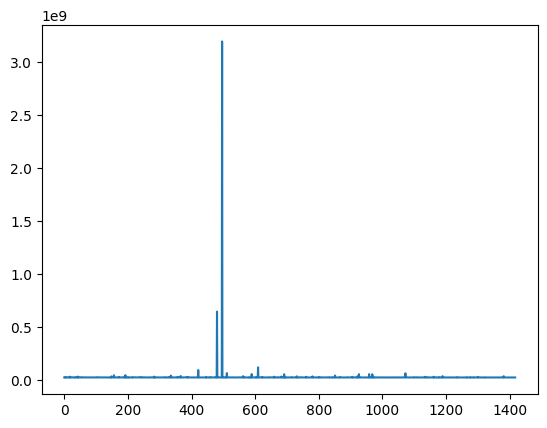

In [25]:
plt.plot(Y['TOTAL_COST'])


(array([1.402e+03, 1.000e+01, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16.81720765, 17.32391706, 17.83062648, 18.3373359 , 18.84404531,
        19.35075473, 19.85746414, 20.36417356, 20.87088298, 21.37759239,
        21.88430181]),
 <BarContainer object of 10 artists>)

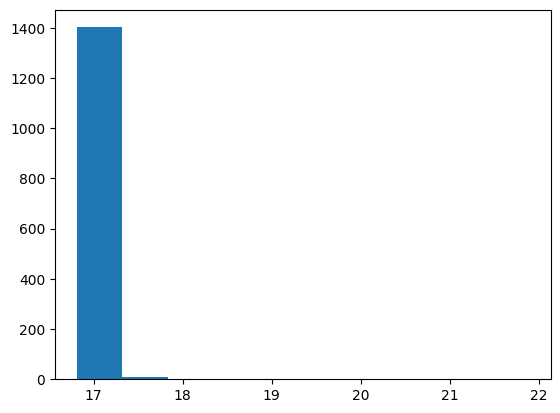

In [26]:
lig = np.log(Y['TOTAL_COST'])

# plt.plot(lig)
plt.hist(lig)

In [27]:
Y_cost_binary = lig>16.83
Y_cost_binary.value_counts()

True     779
False    639
Name: TOTAL_COST, dtype: int64

In [28]:
scaler.fit(np.array(Y['TOTAL_COST']).reshape(-1,1))
Y['TOTAL_COST']= Y_cost_binary
Y['TOTAL_COST'] = Y['TOTAL_COST'].map(lambda x: 1 if x==True else 0)

In [29]:
cost_threshold =  16.83
Y

TOTAL_COST  INJURE_BOOL  FATAL_BOOL
0              1            0           0
1              0            1           0
2              1            0           0
3              1            0           0
4              0            0           0
...          ...          ...         ...
1413           1            0           0
1414           1            1           0
1415           1            0           0
1416           0            0           0
1417           0            0           0

[1418 rows x 3 columns]

In [30]:
y = pd.DataFrame(Y, columns=['TOTAL_COST','INJURE','FATAL'])

In [31]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import r2_score

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_transform,Y,train_size=0.7,random_state=123)

In [33]:
y_train

TOTAL_COST  INJURE_BOOL  FATAL_BOOL
1033           1            0           0
429            1            1           0
902            0            1           0
783            0            0           0
946            0            0           0
...          ...          ...         ...
1041           0            1           0
1122           0            1           0
1346           0            0           0
1406           1            0           0
1389           0            0           0

[992 rows x 3 columns]

<Axes: xlabel='TOTAL_COST', ylabel='Count'>

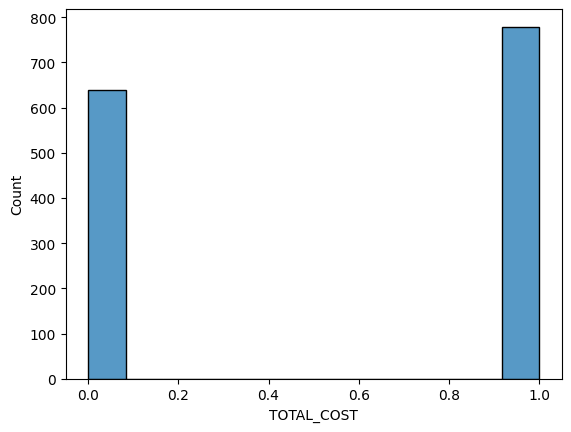

In [34]:
sns.histplot(y['TOTAL_COST'])

<Axes: xlabel='INJURE_BOOL', ylabel='Count'>

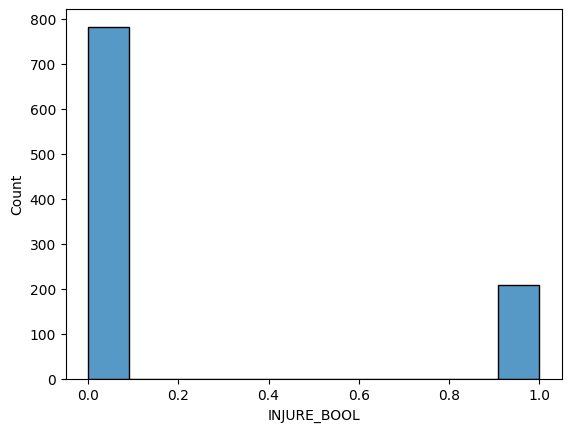

In [35]:
sns.histplot(y_train['INJURE_BOOL'])

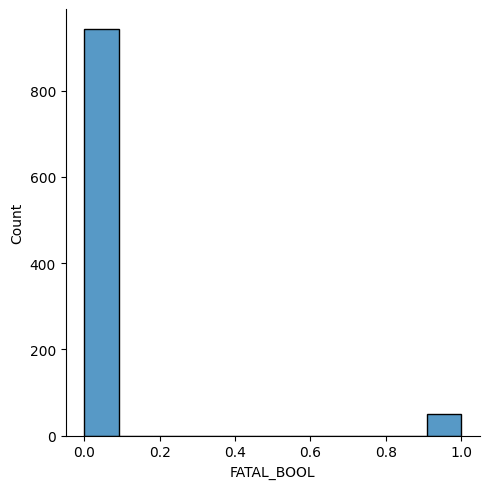

In [36]:
sns.displot(y_train['FATAL_BOOL'])

<Axes: >

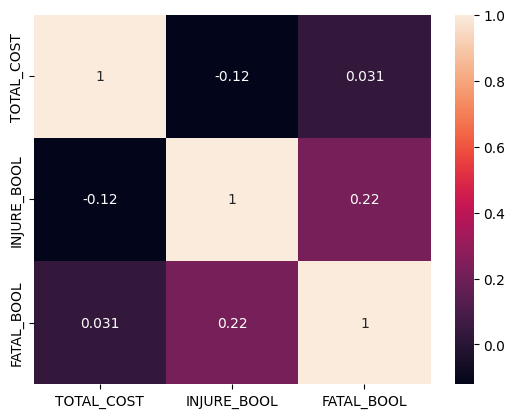

In [37]:
corr = Y.corr()
sns.heatmap(corr, annot = True)

<Axes: >

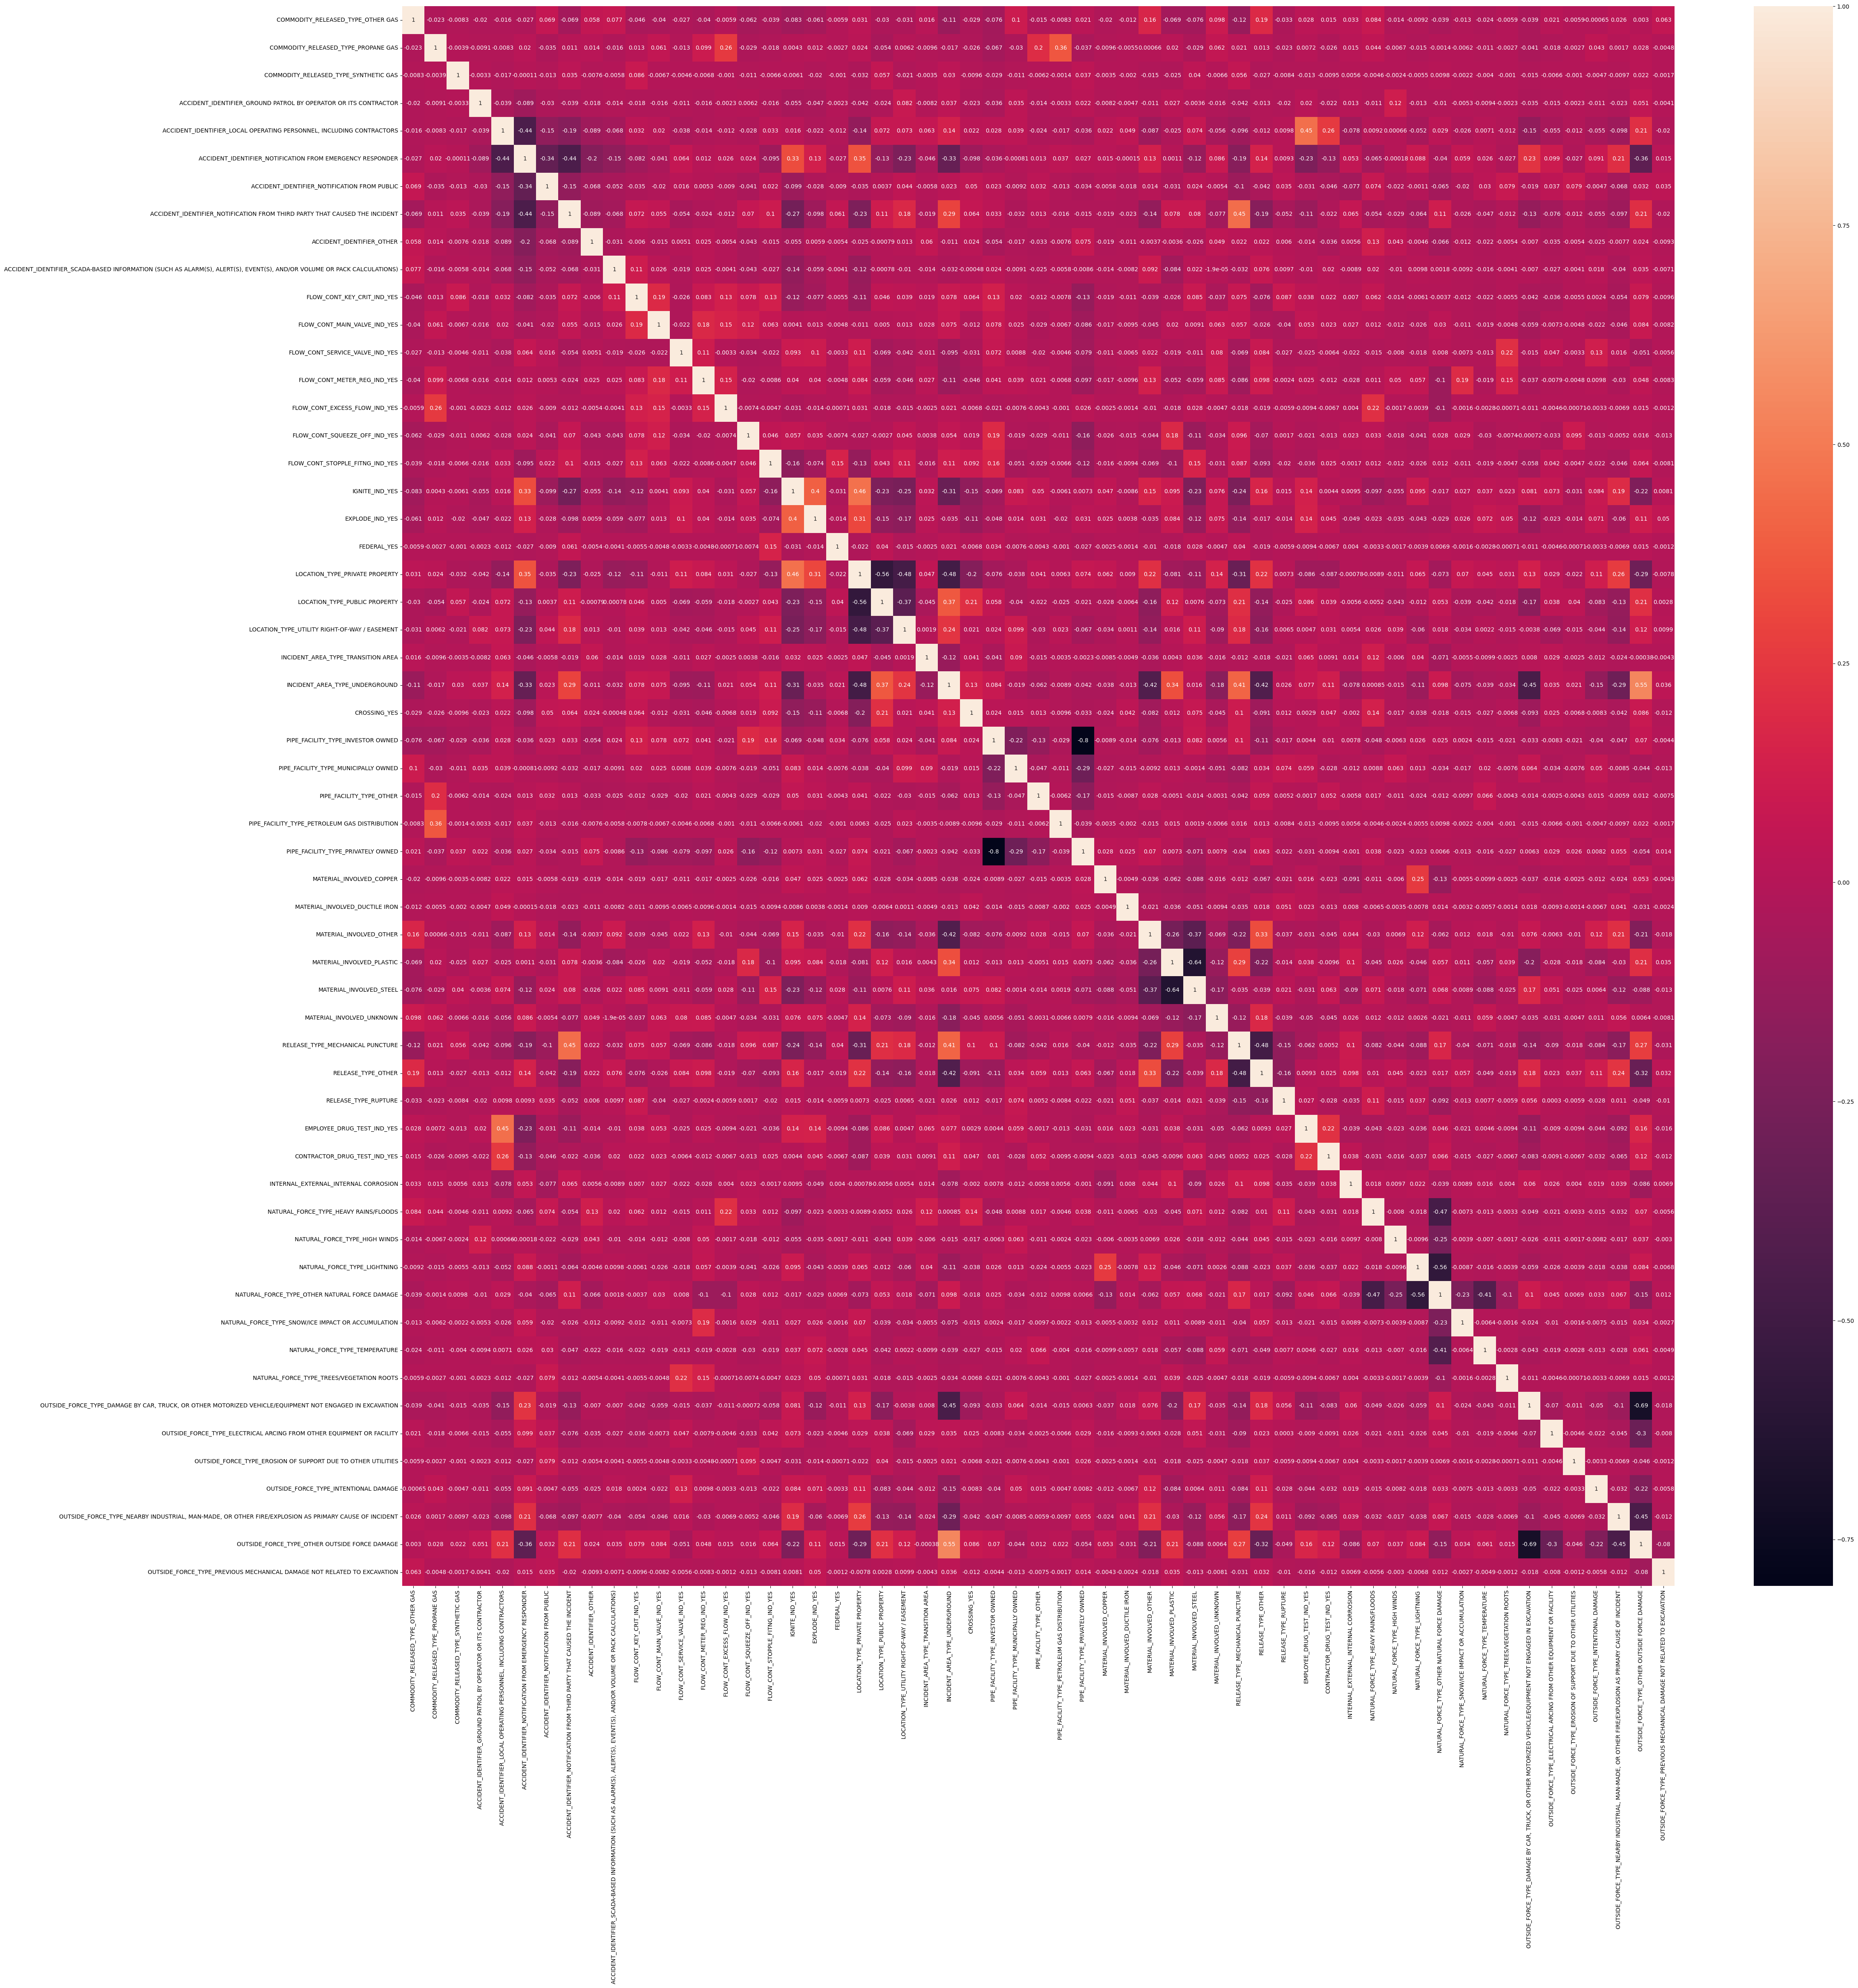

In [38]:
plt.figure(figsize=(50,50))
corr = X_transform.corr()
sns.heatmap(corr, annot = True)


In [39]:
len(Y['TOTAL_COST'].value_counts()),len(Y['INJURE_BOOL'].value_counts()),len(Y['FATAL_BOOL'].value_counts()),len(Y)

(2, 2, 2, 1418)

### TOTAL COST PREDICTION

In [40]:
# Random Forest

max_depth=[2,4,8,16,32,64]
ntrees = [4,8,16,32]
max_features = [0.1,0.2,0.3,0.5,0.9]

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=RandomForestClassifier(random_state = 123,class_weight='balanced'),
    param_grid={'max_depth':max_depth, 'n_estimators':ntrees,'max_features':max_features},
    scoring='f1',
    cv=5
)

oversample = SMOTE()
inp, out = oversample.fit_resample(X_train,y_train['TOTAL_COST'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'max_depth': 8, 'max_features': 0.5, 'n_estimators': 4}


In [41]:
inp.shape, out.value_counts()

((1086, 57),
 1    543
 0    543
 Name: TOTAL_COST, dtype: int64)

In [43]:
y_pred = grid_result.predict(X_test)
y_pred_rfCOST = y_pred
y_true = y_test['TOTAL_COST']

print(metrics.classification_report(y_true,y_pred))
print('Accuracy:',metrics.accuracy_score(y_true,y_pred))
print(metrics.confusion_matrix(y_true,y_pred))


              precision    recall  f1-score   support

           0       0.56      0.73      0.63       190
           1       0.71      0.53      0.61       236

    accuracy                           0.62       426
   macro avg       0.63      0.63      0.62       426
weighted avg       0.64      0.62      0.62       426

Accuracy: 0.6197183098591549
[[138  52]
 [110 126]]


In [44]:
#  Decision Tree
pram_dict = {'criterion' : ['gini','entropy'],
             'max_depth': [2,4,6,8,10],
             'min_samples_split' : [2,4,6,8,10],
             'min_samples_leaf' : range(1,5)}

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state = 123,class_weight='balanced'),
    param_grid=pram_dict,
    scoring='f1',
    cv=5
)

oversample = SMOTE()

inp, out = oversample.fit_resample(X_train,y_train['TOTAL_COST'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 8}


In [45]:
y_pred = grid_result.predict(X_test)
y_pred_dtCOST = y_pred
y_true = y_test['TOTAL_COST']

print(metrics.classification_report(y_true,y_pred))
print('Accuracy:',metrics.accuracy_score(y_true,y_pred))
print(metrics.confusion_matrix(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.73      0.63       190
           1       0.71      0.54      0.61       236

    accuracy                           0.62       426
   macro avg       0.63      0.63      0.62       426
weighted avg       0.64      0.62      0.62       426

Accuracy: 0.6220657276995305
[[138  52]
 [109 127]]


In [46]:
 # Gradient boost

pram_dict = {'learning_rate':[0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,500,1000,1500]}

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state = 123),
    param_grid=pram_dict,
    scoring='f1',
    cv=5
)

oversample = SMOTE()
inp, out = oversample.fit_resample(X_train,y_train['TOTAL_COST'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'learning_rate': 0.01, 'n_estimators': 1000}


In [47]:
y_pred = grid_result.predict(X_test)
y_pred_gbCOST = y_pred
y_true = y_test['TOTAL_COST']

print(metrics.classification_report(y_true,y_pred))
print('Accuracy:',metrics.accuracy_score(y_true,y_pred))
print(metrics.confusion_matrix(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       190
           1       0.69      0.67      0.68       236

    accuracy                           0.65       426
   macro avg       0.65      0.65      0.65       426
weighted avg       0.65      0.65      0.65       426

Accuracy: 0.6525821596244131
[[121  69]
 [ 79 157]]


# INJURIES PREDICTION

In [48]:
# Random Forest

max_depth=[8,16,32,64]
max_features = [0.3,0.5,0.9]

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=RandomForestClassifier(random_state = 123,class_weight='balanced'),
    param_grid={'max_depth':max_depth, 'n_estimators':ntrees,'max_features':max_features},
    scoring='f1',
    cv=5
)



oversample = SMOTE()
inp, out = oversample.fit_resample(X_train,y_train['INJURE_BOOL'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'max_depth': 16, 'max_features': 0.3, 'n_estimators': 32}


In [49]:
inp.shape, out.value_counts()

((1566, 57),
 0    783
 1    783
 Name: INJURE_BOOL, dtype: int64)

In [50]:
y_pred = grid_result.predict(X_test)
y_pred_rfINJ = y_pred
print(metrics.classification_report(y_test['INJURE_BOOL'],y_pred))
print('Accuracy:',metrics.accuracy_score(y_test['INJURE_BOOL'],y_pred))
print(metrics.confusion_matrix(y_test['INJURE_BOOL'],y_pred))


              precision    recall  f1-score   support

           0       0.87      0.89      0.88       341
           1       0.53      0.48      0.50        85

    accuracy                           0.81       426
   macro avg       0.70      0.69      0.69       426
weighted avg       0.80      0.81      0.81       426

Accuracy: 0.8098591549295775
[[304  37]
 [ 44  41]]


In [51]:
#  Decision Tree
pram_dict = {'criterion' : ['gini','entropy'],
             'max_depth': [2,4,6,8,10],
             'min_samples_split' : [2,4,6,8,10],
             'min_samples_leaf' : range(1,5)}

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state = 123,class_weight='balanced'),
    param_grid=pram_dict,
    scoring='f1',
    cv=5
)

oversample = SMOTE()

inp, out = oversample.fit_resample(X_train,y_train['INJURE_BOOL'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 8}


In [52]:
y_pred = grid_result.predict(X_test)
y_pred_dtINJ = y_pred
print(metrics.classification_report(y_test['INJURE_BOOL'],y_pred))
print('Accuracy:',metrics.accuracy_score(y_test['INJURE_BOOL'],y_pred))
print(metrics.confusion_matrix(y_test['INJURE_BOOL'],y_pred))


              precision    recall  f1-score   support

           0       0.89      0.60      0.72       341
           1       0.30      0.69      0.42        85

    accuracy                           0.62       426
   macro avg       0.60      0.65      0.57       426
weighted avg       0.77      0.62      0.66       426

Accuracy: 0.6197183098591549
[[205 136]
 [ 26  59]]


In [53]:
# Gradient boost

pram_dict = {'learning_rate':[0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,500,1000,1500]}

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state = 123),
    param_grid=pram_dict,
    scoring='f1',
    cv=5
)

oversample = SMOTE()
inp, out = oversample.fit_resample(X_train,y_train['INJURE_BOOL'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'learning_rate': 0.1, 'n_estimators': 1000}


In [54]:
y_pred = grid_result.predict(X_test)
y_pred_gbINJ = y_pred
print(metrics.classification_report(y_test['INJURE_BOOL'],y_pred))
print('Accuracy:',metrics.accuracy_score(y_test['INJURE_BOOL'],y_pred))
print(metrics.confusion_matrix(y_test['INJURE_BOOL'],y_pred))


              precision    recall  f1-score   support

           0       0.83      0.88      0.86       341
           1       0.38      0.28      0.32        85

    accuracy                           0.76       426
   macro avg       0.60      0.58      0.59       426
weighted avg       0.74      0.76      0.75       426

Accuracy: 0.7629107981220657
[[301  40]
 [ 61  24]]


# FATALITIES PREDICTION

In [55]:
# Random Forest

max_depth=[2,4,8,16,32,64]
ntrees = [4,8,16,32]
max_features = [0.1,0.2,0.3,0.5,0.9]

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=RandomForestClassifier(random_state = 123,class_weight='balanced'),
    param_grid={'max_depth':max_depth, 'n_estimators':ntrees,'max_features':max_features},
    scoring='f1',
    cv=5
)



oversample = SMOTE()
inp, out = oversample.fit_resample(X_train,y_train['FATAL_BOOL'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'max_depth': 64, 'max_features': 0.1, 'n_estimators': 32}


In [56]:
y_pred = grid_result.predict(X_test)
y_pred_rfFAT = y_pred
print(metrics.classification_report(y_test['FATAL_BOOL'],y_pred))
print('Accuracy:',metrics.accuracy_score(y_test['FATAL_BOOL'],y_pred))
print(metrics.confusion_matrix(y_test['FATAL_BOOL'],y_pred))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       389
           1       0.20      0.05      0.09        37

    accuracy                           0.90       426
   macro avg       0.56      0.52      0.52       426
weighted avg       0.85      0.90      0.87       426

Accuracy: 0.8990610328638498
[[381   8]
 [ 35   2]]


In [57]:
#  Decision Tree
pram_dict = {'criterion' : ['gini','entropy'],
             'max_depth': [2,4,6,8,10],
             'min_samples_split' : [2,4,6,8,10],
             'min_samples_leaf' : range(1,5)}

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state = 123,class_weight='balanced'),
    param_grid=pram_dict,
    scoring='f1',
    cv=5
)

oversample = SMOTE()

inp, out = oversample.fit_resample(X_train,y_train['FATAL_BOOL'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [58]:
y_pred = grid_result.predict(X_test)
y_pred_dtFAT = y_pred
print(metrics.classification_report(y_test['FATAL_BOOL'],y_pred))
print('Accuracy:',metrics.accuracy_score(y_test['FATAL_BOOL'],y_pred))
print(metrics.confusion_matrix(y_test['FATAL_BOOL'],y_pred))


              precision    recall  f1-score   support

           0       0.91      0.99      0.95       389
           1       0.00      0.00      0.00        37

    accuracy                           0.90       426
   macro avg       0.46      0.49      0.47       426
weighted avg       0.83      0.90      0.87       426

Accuracy: 0.903755868544601
[[385   4]
 [ 37   0]]


In [59]:
# Gradient boost

pram_dict = {'learning_rate':[0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,500,1000,1500]}

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state = 123),
    param_grid=pram_dict,
    scoring='f1',
    cv=5
)


oversample = SMOTE()
inp, out = oversample.fit_resample(X_train,y_train['FATAL_BOOL'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'learning_rate': 0.05, 'n_estimators': 1000}


In [61]:
y_pred = grid_result.predict(X_test)
y_pred_gbFAT = y_pred
print(metrics.classification_report(y_test['FATAL_BOOL'],y_pred))
print('Accuracy:',metrics.accuracy_score(y_test['FATAL_BOOL'],y_pred))
print(metrics.confusion_matrix(y_test['FATAL_BOOL'],y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       389
           1       0.13      0.05      0.08        37

    accuracy                           0.89       426
   macro avg       0.52      0.51      0.51       426
weighted avg       0.85      0.89      0.87       426

Accuracy: 0.8873239436619719
[[376  13]
 [ 35   2]]


In [62]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.8 MB/s eta 0:00:00


In [63]:
from pgmpy.models import BayesianModel, BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator, HillClimbSearch
from pgmpy.estimators import BDsScore, K2Score, BicScore

In [64]:
val = [y_pred_rfCOST,y_pred_rfINJ,y_pred_rfFAT,y_pred_dtCOST,y_pred_dtINJ,y_pred_dtFAT,y_pred_gbCOST,y_pred_gbINJ,y_pred_gbFAT]
for i in range(len(val)):
  if y_test.shape[0]!=val[i].shape[0]:
    print(i)
y_test.shape

(426, 3)

# Bayesian

In [79]:
Bayes_Train_INJ = X_train.copy()
Bayes_Train_INJ['INJURE_BOOL']=y_train['INJURE_BOOL']

Bayes_Train_FAT = X_train.copy()
Bayes_Train_FAT['FATAL_BOOL']=y_train['FATAL_BOOL']

Bayes_Train_COST = X_train.copy()
Bayes_Train_COST['TOTAL_COST']=y_train['TOTAL_COST']

In [80]:
hc_INJ = HillClimbSearch(Bayes_Train_INJ, BicScore(X))
best_model_INJ = hc_INJ.estimate()
print(best_model_INJ.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('COMMODITY_RELEASED_TYPE_PROPANE GAS', 'PIPE_FACILITY_TYPE_PRIVATELY OWNED'), ('COMMODITY_RELEASED_TYPE_SYNTHETIC GAS', 'FLOW_CONT_KEY_CRIT_IND_YES'), ('COMMODITY_RELEASED_TYPE_SYNTHETIC GAS', 'MATERIAL_INVOLVED_PLASTIC'), ('COMMODITY_RELEASED_TYPE_SYNTHETIC GAS', 'PIPE_FACILITY_TYPE_INVESTOR OWNED'), ('COMMODITY_RELEASED_TYPE_SYNTHETIC GAS', 'INJURE_BOOL'), ('ACCIDENT_IDENTIFIER_GROUND PATROL BY OPERATOR OR ITS CONTRACTOR', 'ACCIDENT_IDENTIFIER_NOTIFICATION FROM EMERGENCY RESPONDER'), ('ACCIDENT_IDENTIFIER_GROUND PATROL BY OPERATOR OR ITS CONTRACTOR', 'LOCATION_TYPE_UTILITY RIGHT-OF-WAY / EASEMENT'), ('ACCIDENT_IDENTIFIER_GROUND PATROL BY OPERATOR OR ITS CONTRACTOR', 'RELEASE_TYPE_MECHANICAL PUNCTURE'), ('ACCIDENT_IDENTIFIER_LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS', 'ACCIDENT_IDENTIFIER_NOTIFICATION FROM EMERGENCY RESPONDER'), ('ACCIDENT_IDENTIFIER_LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS', 'CONTRACTOR_DRUG_TEST_IND_YES'), ('ACCIDENT_IDENTIFIER_LOCAL OPERATING PERSO

In [83]:
model_INJ = BayesianNetwork(best_model_INJ.edges())
model_INJ.fit(Bayes_Train_INJ)

In [84]:
Bayes_Train_INJ.columns.difference(X_test.columns)

Index(['INJURE_BOOL'], dtype='object')

In [87]:
unrelated_columns = list(Bayes_Train_INJ.columns.difference(model_INJ.nodes))
unrelated_columns

['FLOW_CONT_EXCESS_FLOW_IND_YES']

In [88]:
X_processed_test = X_test.drop(unrelated_columns,axis=1)

y_pred_naiINJ = model_INJ.predict(X_processed_test)

print(metrics.classification_report(y_test['INJURE_BOOL'],y_pred_naiINJ))
print('Accuracy:',metrics.accuracy_score(y_test['INJURE_BOOL'],y_pred_naiINJ))
print(metrics.confusion_matrix(y_test['INJURE_BOOL'],y_pred_naiINJ))


  0%|          | 0/360 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       341
           1       0.44      0.28      0.34        85

    accuracy                           0.78       426
   macro avg       0.64      0.60      0.61       426
weighted avg       0.76      0.78      0.77       426

Accuracy: 0.784037558685446
[[310  31]
 [ 61  24]]


In [89]:
y_pred_naiINJ.shape

(426, 1)

In [90]:
hc_FAT = HillClimbSearch(Bayes_Train_FAT, BicScore(X))
best_model_FAT = hc_FAT.estimate()
print(best_model_FAT.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('COMMODITY_RELEASED_TYPE_PROPANE GAS', 'PIPE_FACILITY_TYPE_PRIVATELY OWNED'), ('COMMODITY_RELEASED_TYPE_SYNTHETIC GAS', 'FLOW_CONT_KEY_CRIT_IND_YES'), ('COMMODITY_RELEASED_TYPE_SYNTHETIC GAS', 'MATERIAL_INVOLVED_PLASTIC'), ('COMMODITY_RELEASED_TYPE_SYNTHETIC GAS', 'PIPE_FACILITY_TYPE_INVESTOR OWNED'), ('ACCIDENT_IDENTIFIER_GROUND PATROL BY OPERATOR OR ITS CONTRACTOR', 'ACCIDENT_IDENTIFIER_NOTIFICATION FROM EMERGENCY RESPONDER'), ('ACCIDENT_IDENTIFIER_GROUND PATROL BY OPERATOR OR ITS CONTRACTOR', 'LOCATION_TYPE_UTILITY RIGHT-OF-WAY / EASEMENT'), ('ACCIDENT_IDENTIFIER_GROUND PATROL BY OPERATOR OR ITS CONTRACTOR', 'RELEASE_TYPE_MECHANICAL PUNCTURE'), ('ACCIDENT_IDENTIFIER_LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS', 'ACCIDENT_IDENTIFIER_NOTIFICATION FROM EMERGENCY RESPONDER'), ('ACCIDENT_IDENTIFIER_LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS', 'CONTRACTOR_DRUG_TEST_IND_YES'), ('ACCIDENT_IDENTIFIER_LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS', 'ACCIDENT_IDENTIFIER_NOTIFIC

In [92]:
model_FAT = BayesianModel(best_model_FAT.edges())
model_FAT.fit(Bayes_Train_FAT)

In [94]:
unrelated_columns = list(Bayes_Train_FAT.columns.difference(model_FAT.nodes))
unrelated_columns

['FLOW_CONT_EXCESS_FLOW_IND_YES']

In [95]:
y_pred_naiFAT = model_FAT.predict(X_processed_test)

print(metrics.classification_report(y_test['FATAL_BOOL'],y_pred_naiFAT))
print('Accuracy:',metrics.accuracy_score(y_test['FATAL_BOOL'],y_pred_naiFAT))
print(metrics.confusion_matrix(y_test['FATAL_BOOL'],y_pred_naiFAT))

  0%|          | 0/360 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       389
           1       0.00      0.00      0.00        37

    accuracy                           0.91       426
   macro avg       0.46      0.50      0.48       426
weighted avg       0.83      0.91      0.87       426

Accuracy: 0.9131455399061033
[[389   0]
 [ 37   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
y_pred_naiFAT.shape

(426, 1)

In [97]:
hc_COST = HillClimbSearch(Bayes_Train_COST, BicScore(X))
best_model_COST = hc_COST.estimate()
print(best_model_COST.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('COMMODITY_RELEASED_TYPE_PROPANE GAS', 'PIPE_FACILITY_TYPE_PRIVATELY OWNED'), ('COMMODITY_RELEASED_TYPE_SYNTHETIC GAS', 'FLOW_CONT_KEY_CRIT_IND_YES'), ('COMMODITY_RELEASED_TYPE_SYNTHETIC GAS', 'TOTAL_COST'), ('COMMODITY_RELEASED_TYPE_SYNTHETIC GAS', 'MATERIAL_INVOLVED_PLASTIC'), ('ACCIDENT_IDENTIFIER_GROUND PATROL BY OPERATOR OR ITS CONTRACTOR', 'ACCIDENT_IDENTIFIER_NOTIFICATION FROM EMERGENCY RESPONDER'), ('ACCIDENT_IDENTIFIER_GROUND PATROL BY OPERATOR OR ITS CONTRACTOR', 'LOCATION_TYPE_UTILITY RIGHT-OF-WAY / EASEMENT'), ('ACCIDENT_IDENTIFIER_GROUND PATROL BY OPERATOR OR ITS CONTRACTOR', 'RELEASE_TYPE_MECHANICAL PUNCTURE'), ('ACCIDENT_IDENTIFIER_LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS', 'ACCIDENT_IDENTIFIER_NOTIFICATION FROM EMERGENCY RESPONDER'), ('ACCIDENT_IDENTIFIER_LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS', 'CONTRACTOR_DRUG_TEST_IND_YES'), ('ACCIDENT_IDENTIFIER_LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS', 'ACCIDENT_IDENTIFIER_NOTIFICATION FROM THIRD PARTY 

In [98]:
model_COST = BayesianModel(best_model_COST.edges())
model_COST.fit(Bayes_Train_COST)

In [99]:
y_pred_naiCOST = model_COST.predict(X_processed_test)

print(metrics.classification_report(y_test['TOTAL_COST'],y_pred_naiCOST))
print('Accuracy:',metrics.accuracy_score(y_test['TOTAL_COST'],y_pred_naiCOST))
print(metrics.confusion_matrix(y_test['TOTAL_COST'],y_pred_naiCOST))

  0%|          | 0/360 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.58      0.63      0.60       190
           1       0.68      0.64      0.66       236

    accuracy                           0.63       426
   macro avg       0.63      0.63      0.63       426
weighted avg       0.64      0.63      0.63       426

Accuracy: 0.6338028169014085
[[119  71]
 [ 85 151]]


In [100]:
y_pred_naiCOST = list(y_pred_naiCOST['TOTAL_COST'])
y_pred_naiFAT = list(y_pred_naiFAT['FATAL_BOOL'])
y_pred_naiINJ = list(y_pred_naiINJ['INJURE_BOOL'])

In [101]:
final_pred = pd.DataFrame()
final_pred['y_test_COST'] = y_test['TOTAL_COST']
final_pred['y_test_INJ'] = y_test['INJURE_BOOL']
final_pred['y_test_FAT'] = y_test['FATAL_BOOL']
final_pred.shape

(426, 3)

In [102]:
val = [y_pred_rfCOST,y_pred_rfINJ,y_pred_rfFAT,y_pred_dtCOST,y_pred_dtINJ,y_pred_dtFAT,y_pred_gbCOST,y_pred_gbINJ,y_pred_gbFAT,y_pred_naiCOST,y_pred_naiINJ,y_pred_naiFAT]
key = ['y_pred_rfCOST','y_pred_rfINJ','y_pred_rfFAT','y_pred_dtCOST','y_pred_dtINJ','y_pred_dtFAT','y_pred_gbCOST','y_pred_gbINJ','y_pred_gbFAT','y_pred_naiCOST','y_pred_naiINJ','y_pred_naiFAT']
for k,v in zip(key,val):
  final_pred[k] = v


In [103]:
final_pred.shape,final_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 646 to 15
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   y_test_COST     426 non-null    int64
 1   y_test_INJ      426 non-null    int64
 2   y_test_FAT      426 non-null    int64
 3   y_pred_rfCOST   426 non-null    int64
 4   y_pred_rfINJ    426 non-null    int64
 5   y_pred_rfFAT    426 non-null    int64
 6   y_pred_dtCOST   426 non-null    int64
 7   y_pred_dtINJ    426 non-null    int64
 8   y_pred_dtFAT    426 non-null    int64
 9   y_pred_gbCOST   426 non-null    int64
 10  y_pred_gbINJ    426 non-null    int64
 11  y_pred_gbFAT    426 non-null    int64
 12  y_pred_naiCOST  426 non-null    int64
 13  y_pred_naiINJ   426 non-null    int64
 14  y_pred_naiFAT   426 non-null    int64
dtypes: int64(15)
memory usage: 53.2 KB


((426, 15), None)

In [104]:
pd.DataFrame.to_csv(final_pred,'Final_Pred.csv')

In [105]:
data = pd.read_csv(r"/content/Final_Pred.csv")

In [106]:
i,f,c = [],[],[]

for co in final_pred.columns:
  if 'INJ' in co:
    i.append(co)
  elif 'FAT' in co:
    f.append(co)
  else:
    c.append(co)
INJ_out = final_pred[i]
FAT_out = final_pred[f]
COST_out = final_pred[c]

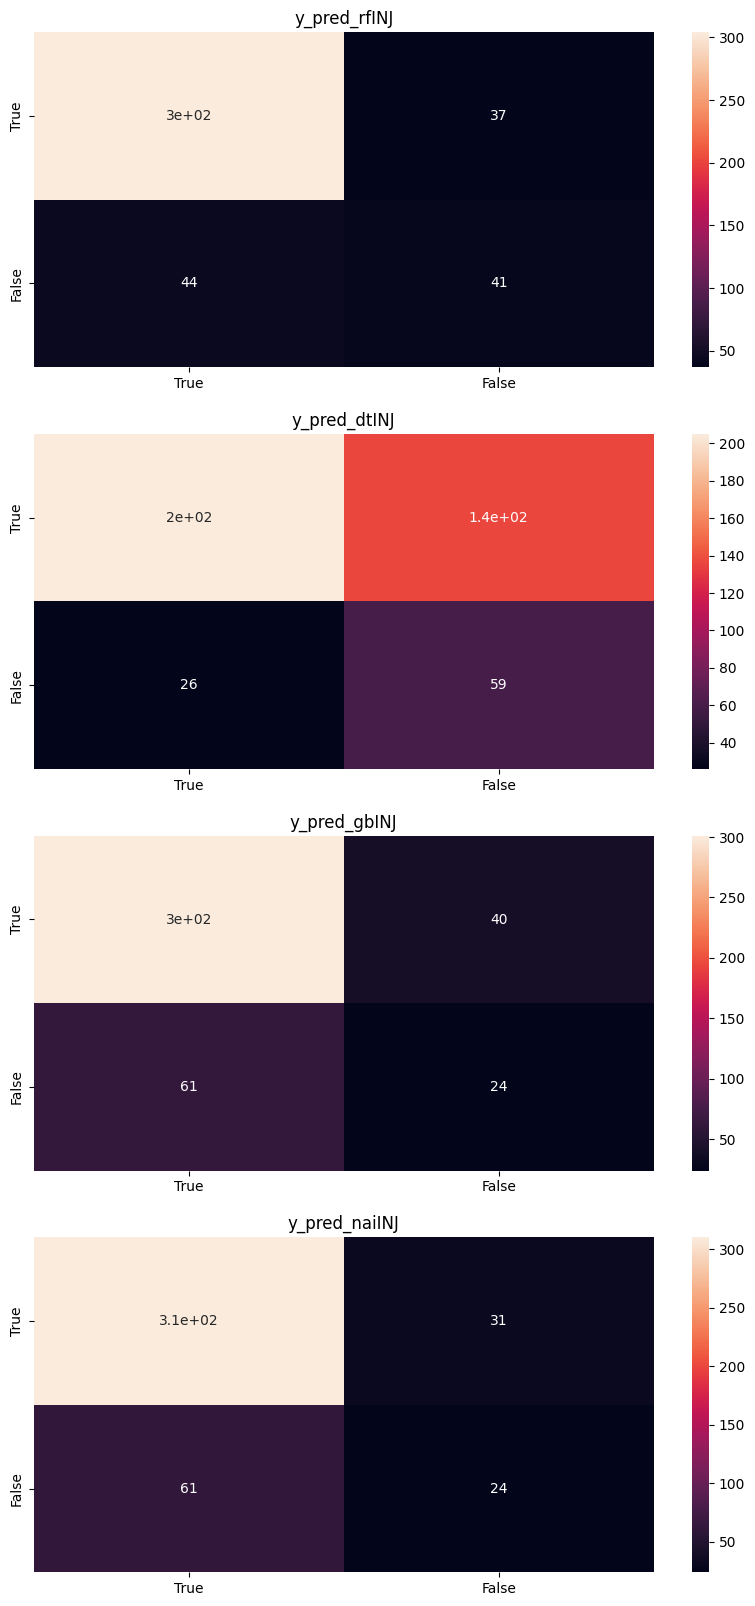

In [107]:
a=0
fig, axs = plt.subplots(4,figsize=(10,20))

for col in  INJ_out.columns:
  if 'test' not in col:
    co = metrics.confusion_matrix(INJ_out['y_test_INJ'],INJ_out[col])
    sns.heatmap(pd.DataFrame(co,index = [i for i in ['True','False']],
                      columns = [i for i in ['True','False']]),annot = True, ax=axs[a])
    axs[a].set_title(col)
    a+=1

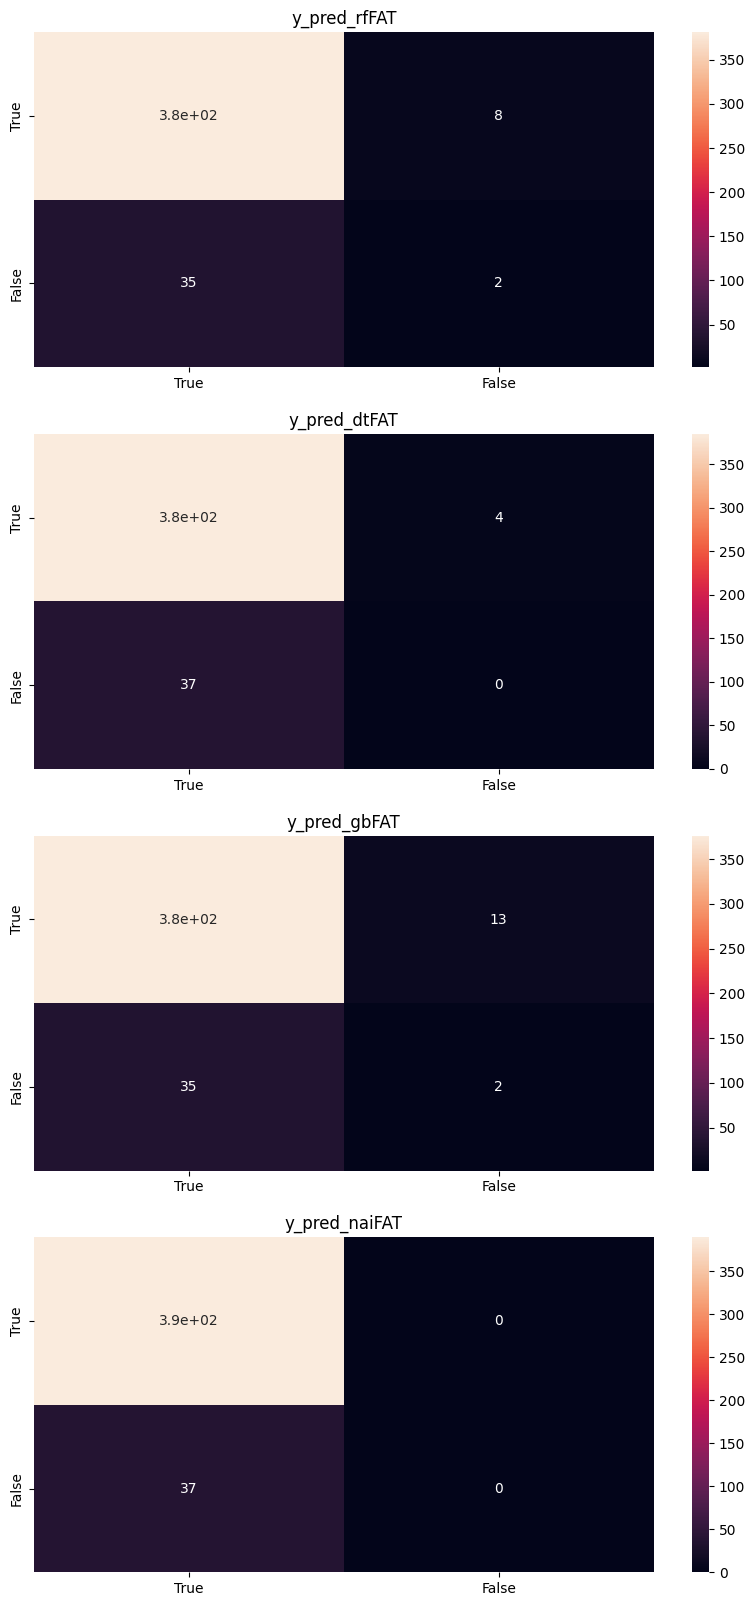

In [108]:
a=0
fig, axs = plt.subplots(4,figsize=(10,20))

for col in  FAT_out.columns:
  if 'test' not in col:
    co = metrics.confusion_matrix(FAT_out['y_test_FAT'],FAT_out[col])
    sns.heatmap(pd.DataFrame(co,index = [i for i in ['True','False']],
                      columns = [i for i in ['True','False']]),annot = True, ax=axs[a])
    axs[a].set_title(col)
    a+=1

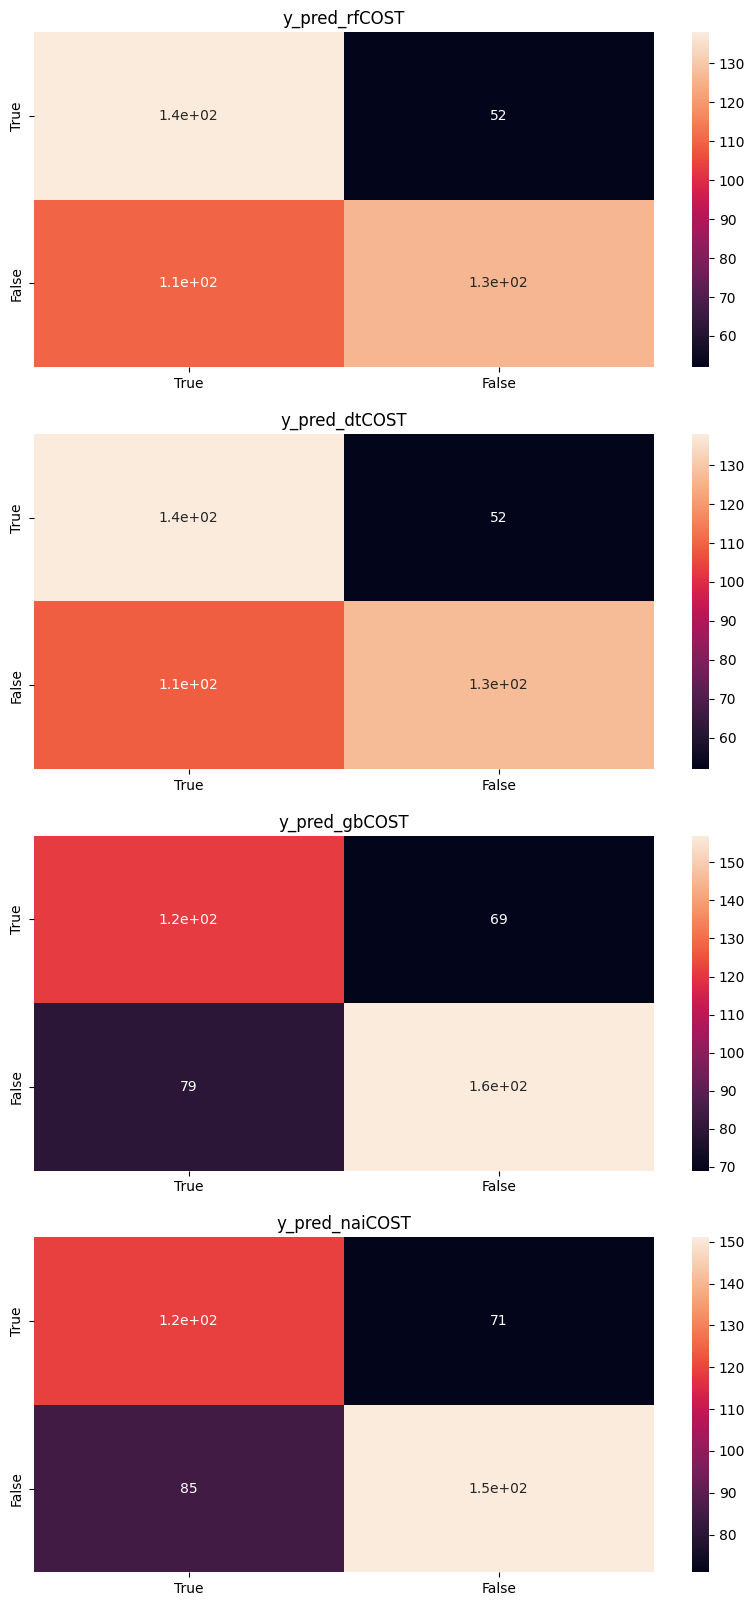

In [109]:
a=0
fig, axs = plt.subplots(4,figsize=(10,20))

for col in  COST_out.columns:
  if 'test' not in col:
    co = metrics.confusion_matrix(COST_out['y_test_COST'],COST_out[col])
    sns.heatmap(pd.DataFrame(co,index = [i for i in ['True','False']],
                      columns = [i for i in ['True','False']]),annot = True, ax=axs[a])
    axs[a].set_title(col)
    a+=1

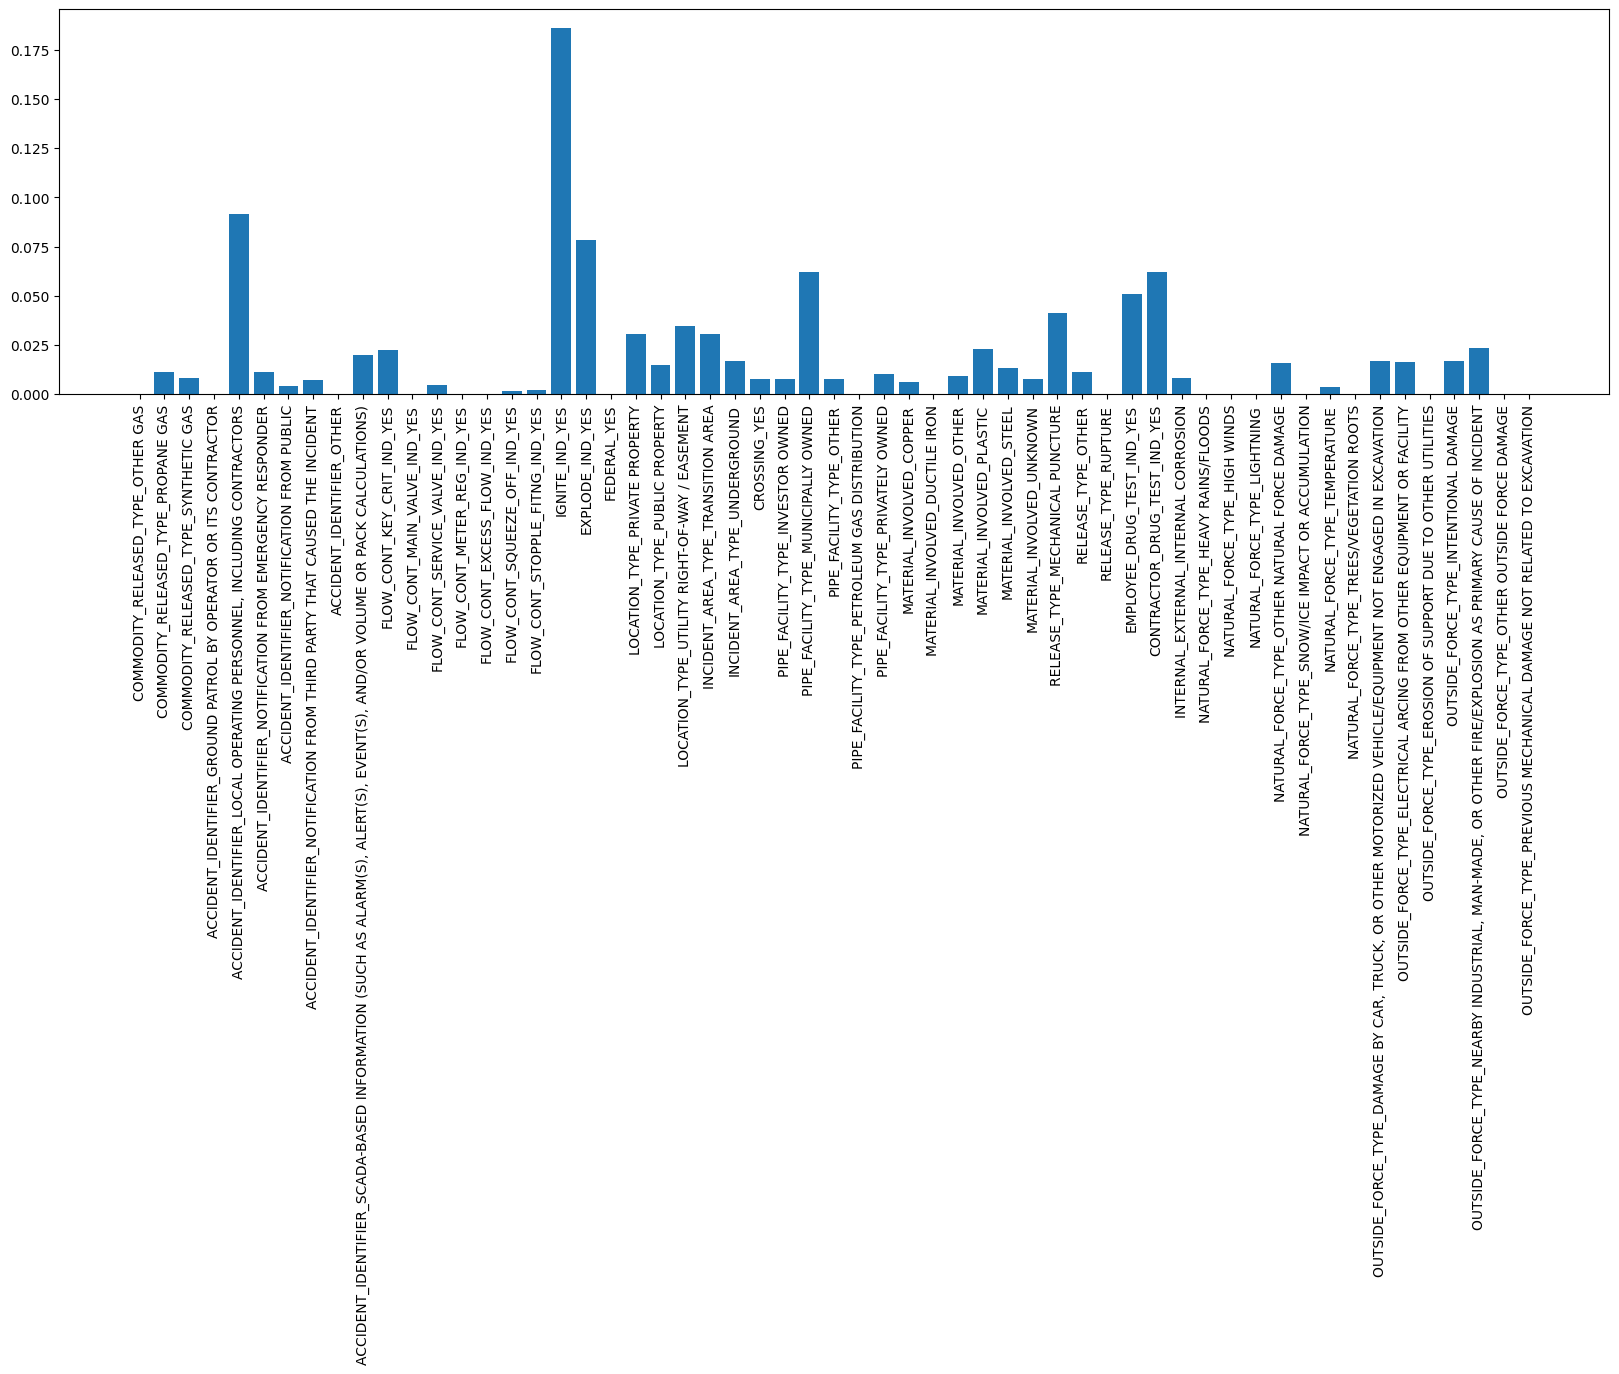

In [110]:
dt_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 1, min_samples_split= 4)
dt_model.fit(X_train,y_train['INJURE_BOOL'])
impor = dt_model.feature_importances_
plt.figure(figsize=(20,5))
plt.bar([x for x in X_train.columns], impor)
plt.xticks(rotation = 90)
plt.show()

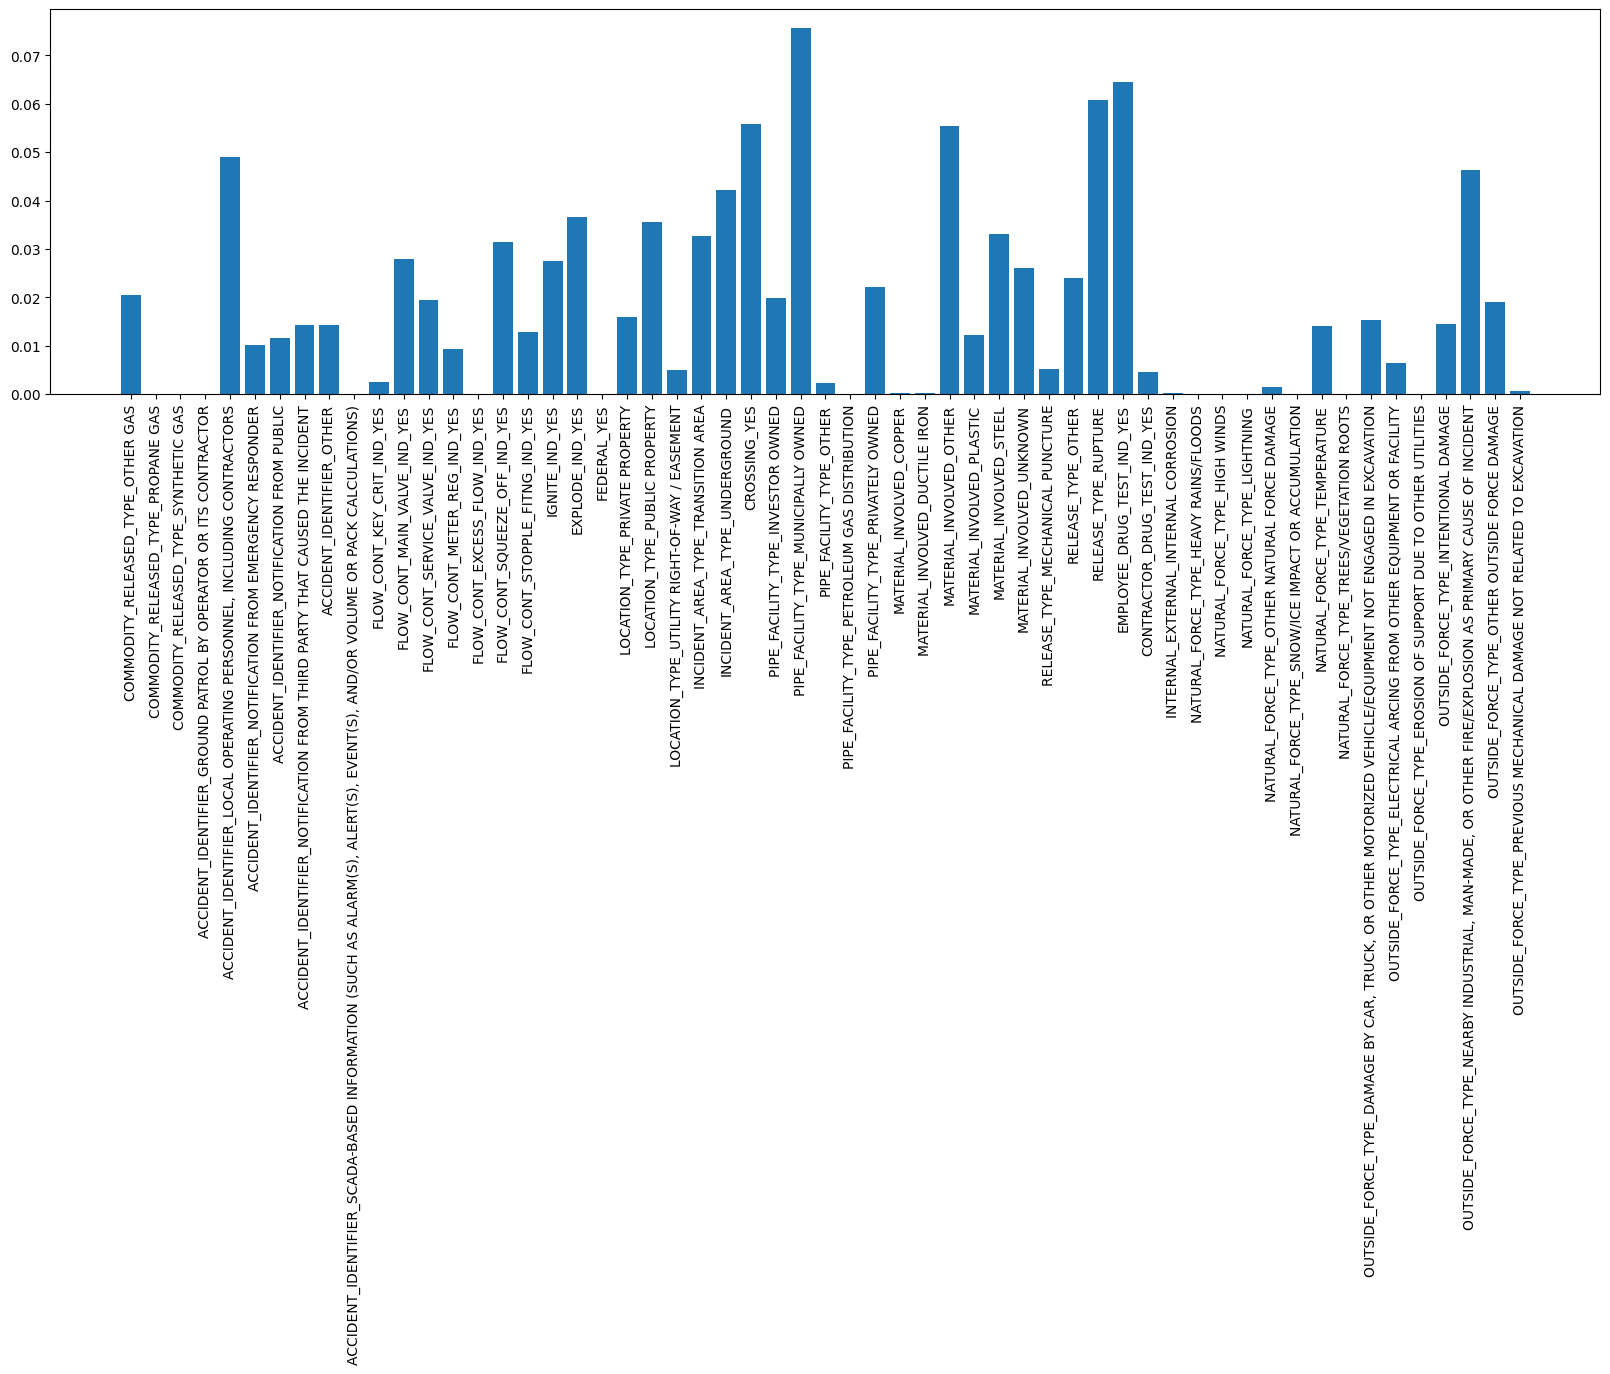

In [111]:
gb_model = GradientBoostingClassifier(learning_rate= 0.05, n_estimators= 1500)
gb_model.fit(X_train,y_train['FATAL_BOOL'])
impor = gb_model.feature_importances_
plt.figure(figsize=(20,5))
plt.bar([x for x in X_train.columns], impor)
plt.xticks(rotation = 90)
plt.show()

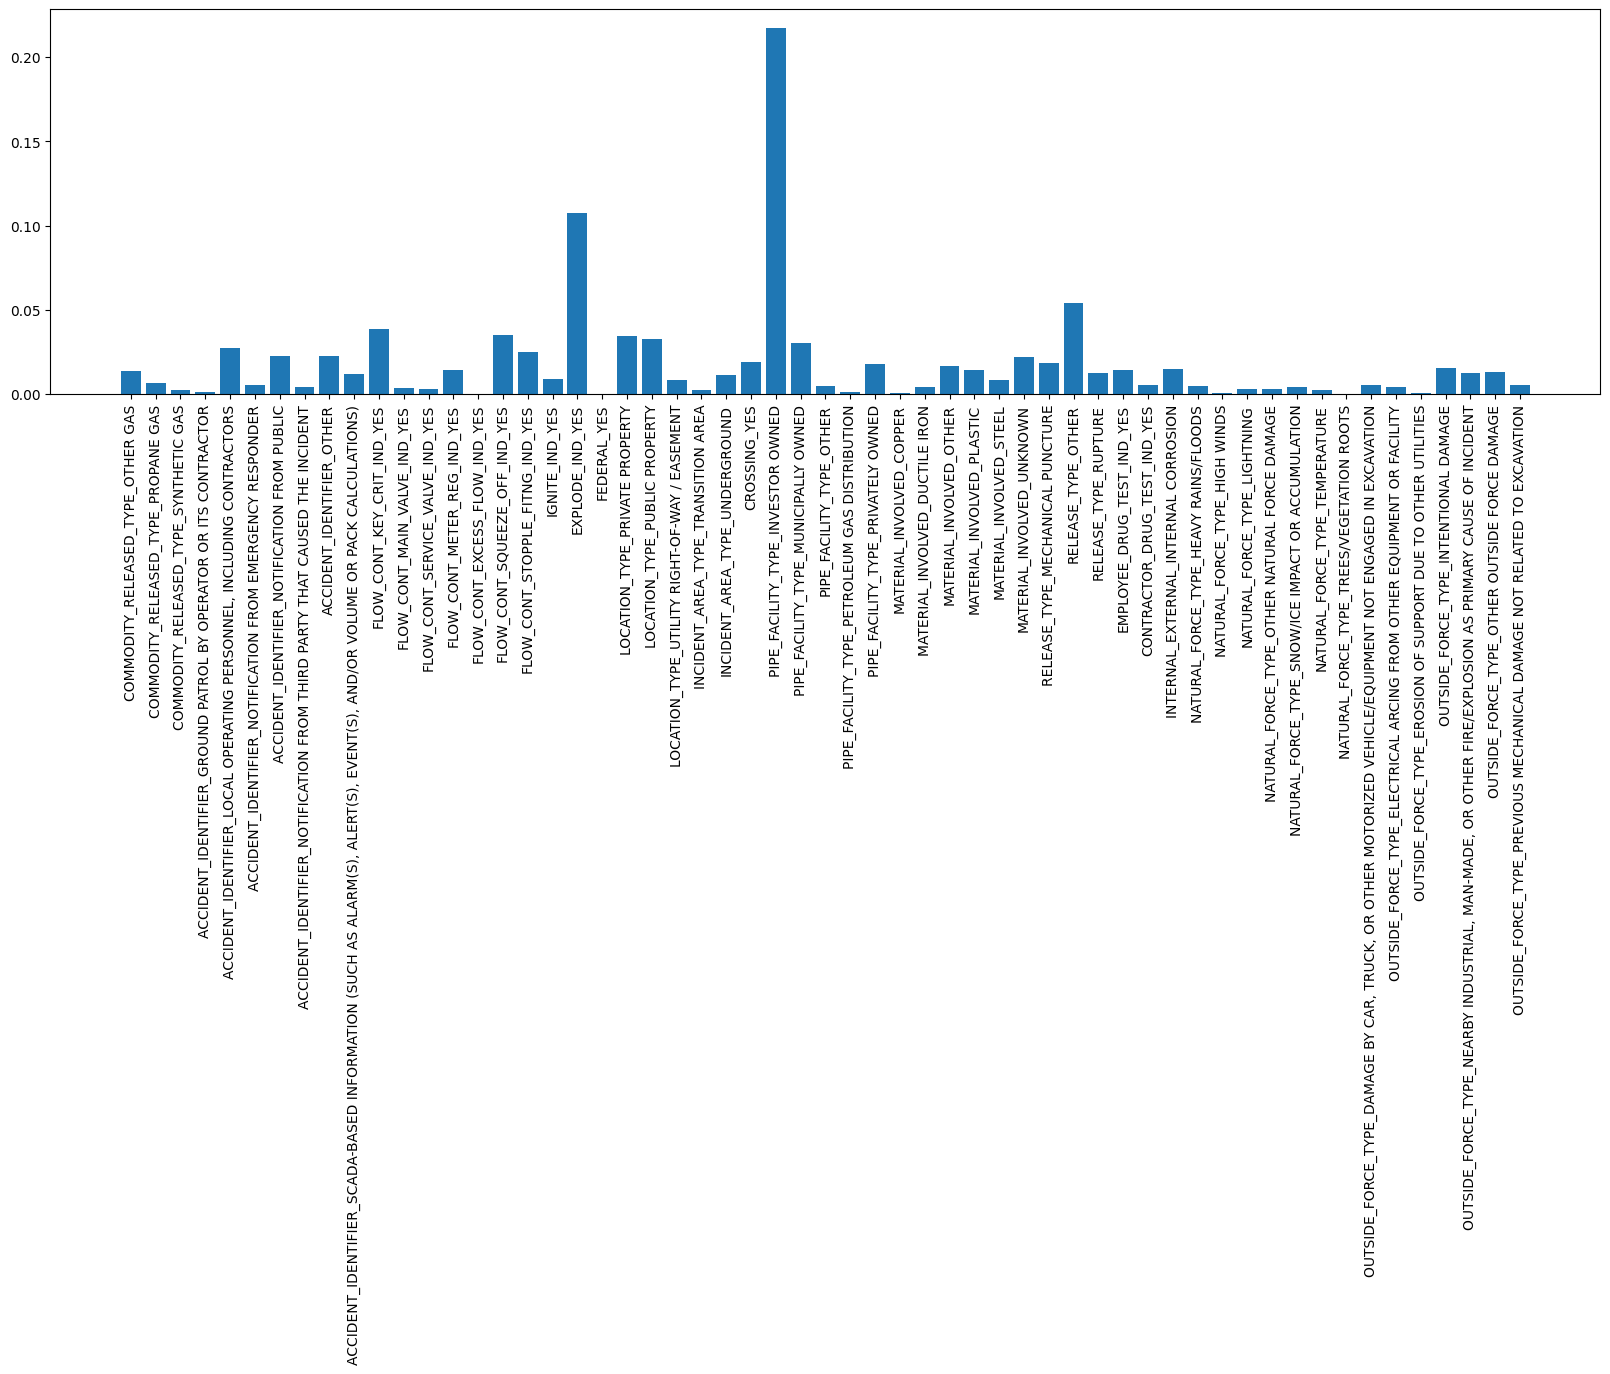

In [112]:
gb_model_2 = GradientBoostingClassifier(learning_rate= 0.05, n_estimators= 500)
gb_model_2.fit(X_train,y_train['TOTAL_COST'])
impor = gb_model_2.feature_importances_
plt.figure(figsize=(20,5))
plt.bar([x for x in X_train.columns], impor)
plt.xticks(rotation = 90)
plt.show()

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

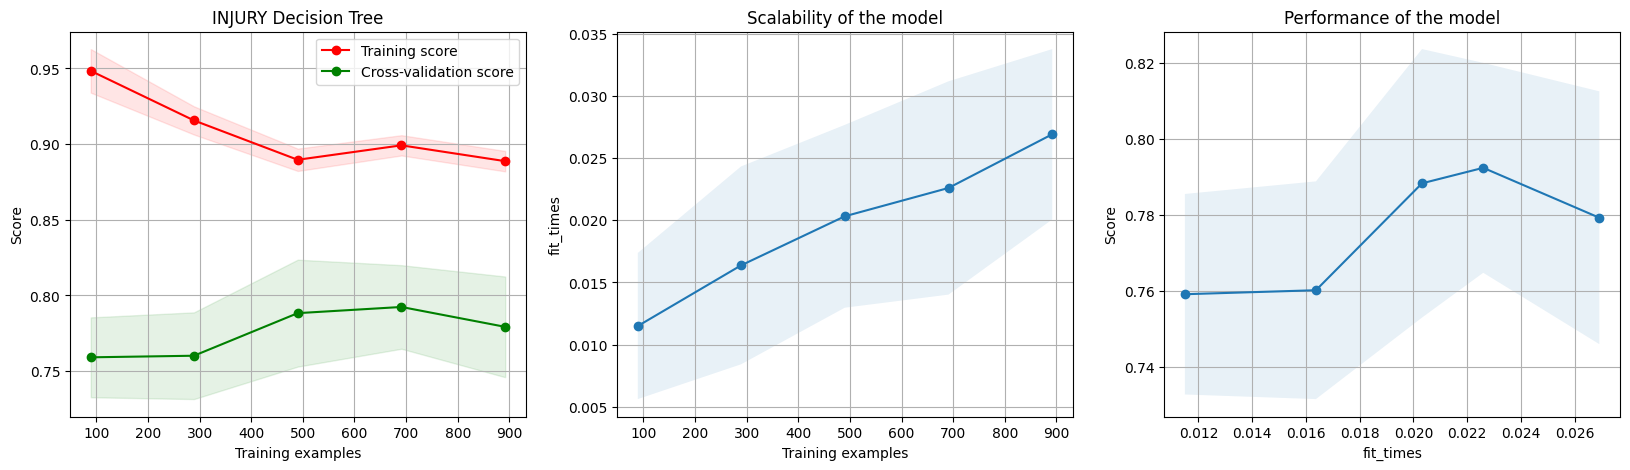

In [114]:
title = "INJURY Decision Tree"
plot_learning_curve(dt_model, title, X_train, y_train['INJURE_BOOL'], cv=10, n_jobs=4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

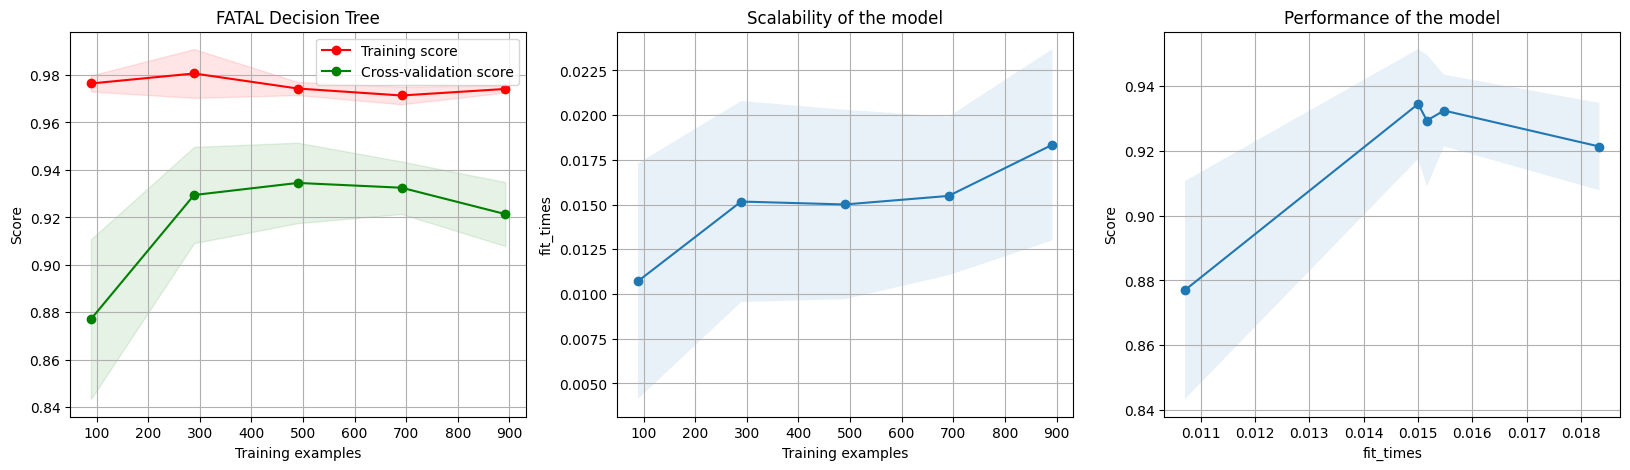

In [117]:
title = "FATAL Decision Tree"
plot_learning_curve(dt_model, title, X_train, y_train['FATAL_BOOL'], cv=10, n_jobs=4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

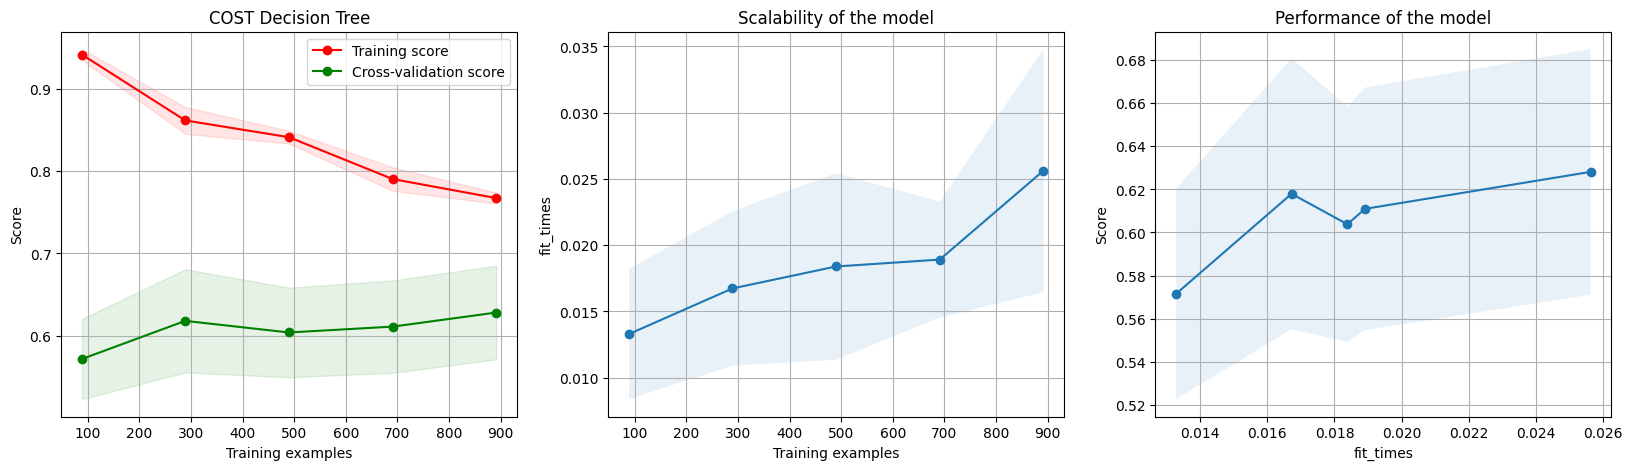

In [119]:
title = "COST Decision Tree"
plot_learning_curve(dt_model, title, X_train, y_train['TOTAL_COST'], cv=10, n_jobs=4)